# Phase 1

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, classification_report
from sklearn import tree

## Bagging

<ipython-input-54-1fa8d6f22dc9>:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(df['Feature 1'], df['Feature 2'], c=y, cmap=plt.cm.get_cmap('rainbow', len(np.unique(y))))


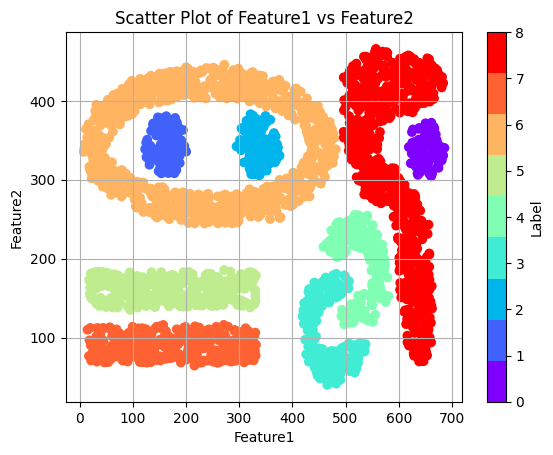

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


n_estimators Bagging = 1:
Train Accuracy: 0.81, Test Accuracy: 0.80
Train Precision: 0.81, Test Precision: 0.80
Train Recall: 0.81, Test Recall: 0.80
Train F1-score: 0.81, Test F1-score: 0.80

n_estimators Bagging = 2:
Train Accuracy: 0.83, Test Accuracy: 0.81
Train Precision: 0.83, Test Precision: 0.81
Train Recall: 0.83, Test Recall: 0.81
Train F1-score: 0.83, Test F1-score: 0.81

n_estimators Bagging = 5:
Train Accuracy: 0.85, Test Accuracy: 0.83
Train Precision: 0.85, Test Precision: 0.83
Train Recall: 0.85, Test Recall: 0.83
Train F1-score: 0.85, Test F1-score: 0.83

n_estimators Bagging = 10:
Train Accuracy: 0.86, Test Accuracy: 0.85
Train Precision: 0.86, Test Precision: 0.85
Train Recall: 0.86, Test Recall: 0.85
Train F1-score: 0.86, Test F1-score: 0.85



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


n_estimators Bagging = 50:
Train Accuracy: 0.87, Test Accuracy: 0.86
Train Precision: 0.87, Test Precision: 0.86
Train Recall: 0.87, Test Recall: 0.86
Train F1-score: 0.87, Test F1-score: 0.86



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


n_estimators Bagging = 100:
Train Accuracy: 0.88, Test Accuracy: 0.87
Train Precision: 0.88, Test Precision: 0.87
Train Recall: 0.88, Test Recall: 0.87
Train F1-score: 0.88, Test F1-score: 0.87



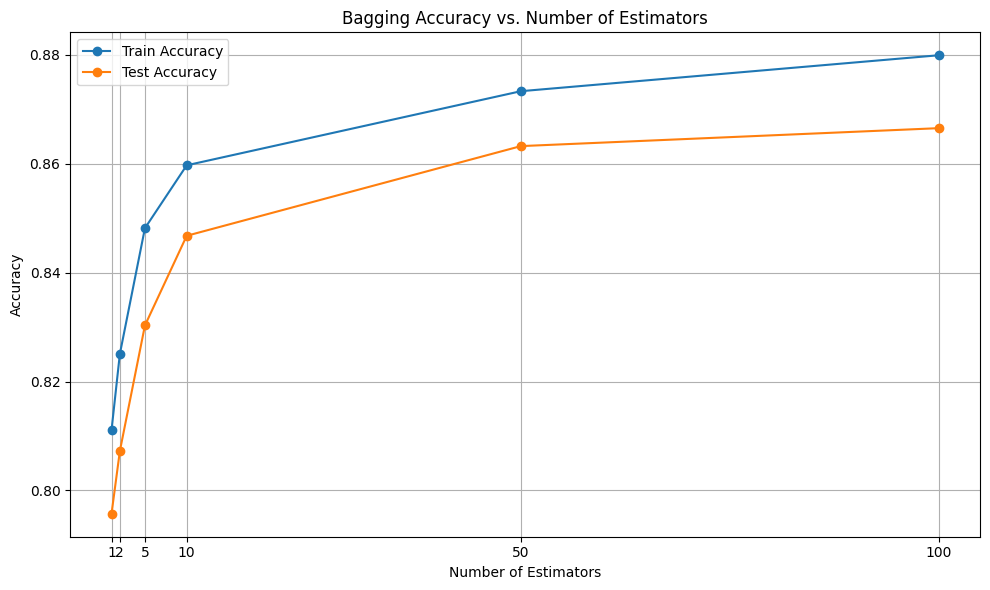

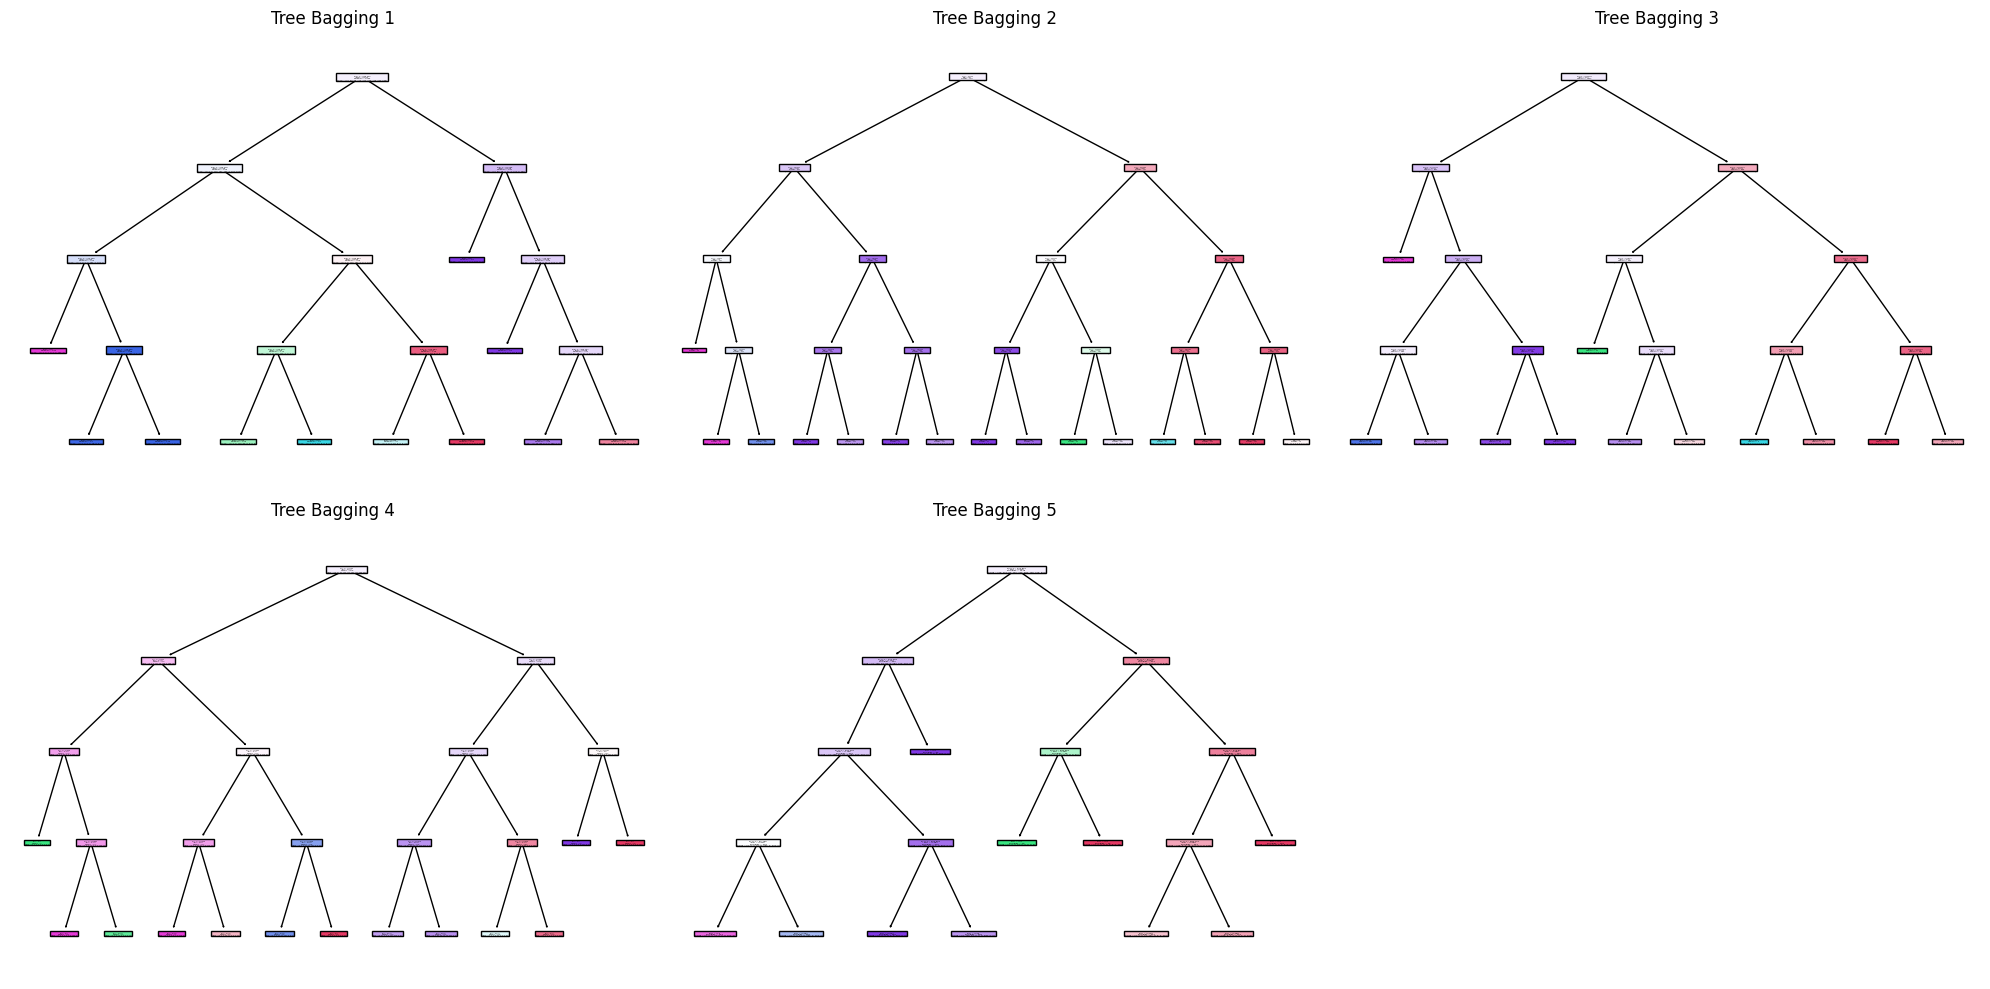

<ipython-input-54-1fa8d6f22dc9>:108: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.get_cmap('rainbow', len(np.unique(y))))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
<ipython-input-54-1fa8d6f22dc9>:108: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.get_cmap('rainbow', len(np.unique(y))))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without f

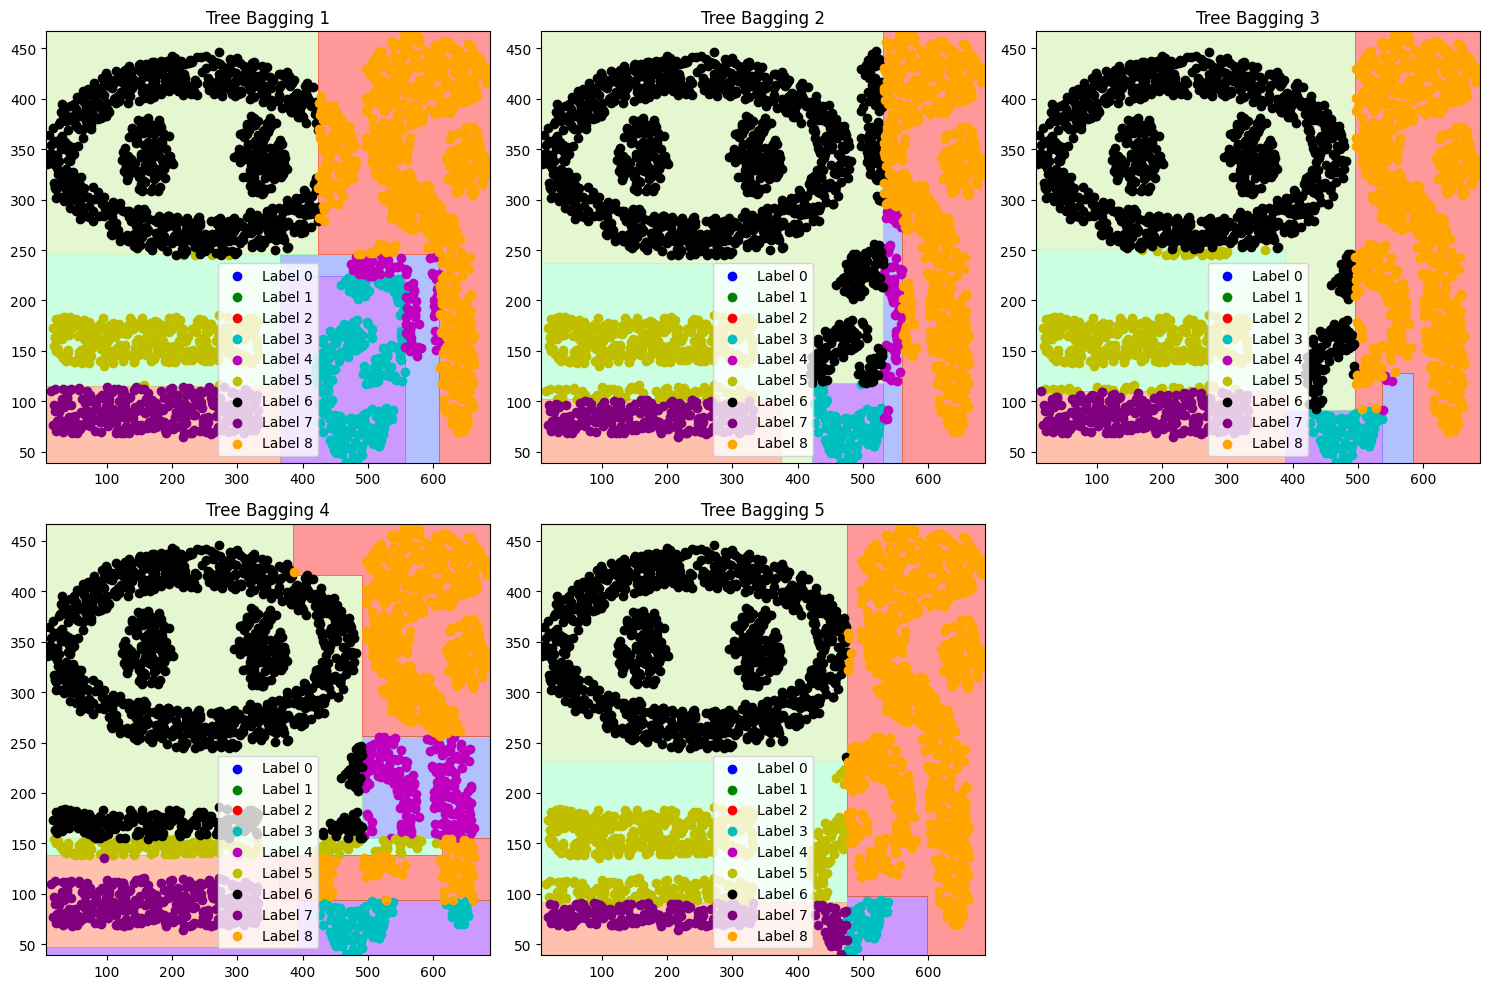

In [54]:
# Define 9 different colors
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'purple', 'orange']

# Read data from CSV file
df = pd.read_csv('/content/drive/My Drive/1/Dataset1.csv')

X = df.drop('Label', axis=1)
y = df['Label']

# Scatter plot of Feature 1 vs Feature 2
plt.scatter(df['Feature 1'], df['Feature 2'], c=y, cmap=plt.cm.get_cmap('rainbow', len(np.unique(y))))
plt.title('Scatter Plot of Feature1 vs Feature2')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.grid(True)
plt.colorbar(ticks=range(len(np.unique(y))), label='Label')
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Number of estimators to evaluate
num_estimators = [1, 2, 5, 10, 50, 100]

train_accuracies = []
test_accuracies = []

# Loop to test different numbers of estimators
for n in num_estimators:
    # Create Bagging model with different numbers of estimators
    bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'),
                                    n_estimators=n,
                                    random_state=42)
    # Train the model on training data
    bagging_clf.fit(X_train, y_train)

    # Predict labels for training and testing data
    y_train_pred = bagging_clf.predict(X_train)
    y_test_pred = bagging_clf.predict(X_test)

    # Compute model accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Store accuracies in lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    # Evaluate the model for training and testing data
    train_f1 = f1_score(y_train, y_train_pred, average='micro')
    test_f1 = f1_score(y_test, y_test_pred, average='micro')

    train_precision = precision_score(y_train, y_train_pred, average='micro')
    test_precision = precision_score(y_test, y_test_pred, average='micro')

    train_recall = recall_score(y_train, y_train_pred, average='micro')
    test_recall = recall_score(y_test, y_test_pred, average='micro')

    print(f'n_estimators Bagging = {n}:')
    print(f'Train Accuracy: {train_accuracy:.2f}, Test Accuracy: {test_accuracy:.2f}')
    print(f'Train Precision: {train_precision:.2f}, Test Precision: {test_precision:.2f}')
    print(f'Train Recall: {train_recall:.2f}, Test Recall: {test_recall:.2f}')
    print(f'Train F1-score: {train_f1:.2f}, Test F1-score: {test_f1:.2f}')
    print()

# Plot Bagging accuracy versus number of estimators
plt.figure(figsize=(10, 6))
plt.plot(num_estimators, train_accuracies, marker='o', label='Train Accuracy')
plt.plot(num_estimators, test_accuracies, marker='o', label='Test Accuracy')
plt.title('Bagging Accuracy vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.xticks(num_estimators)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Display five random trees from the model
plt.figure(figsize=(20, 10))
for i in range(5):
    plt.subplot(2, 3, i + 1)

    # Plot the tree
    plot_tree(bagging_clf.estimators_[i], filled=True)  # Use plot_tree to plot the tree
    plt.title(f'Tree Bagging {i + 1}')

plt.tight_layout()
plt.show()

# Plot decision boundaries
plt.figure(figsize=(15, 10))

# Create a mesh grid
x_min, x_max = X['Feature 1'].min() - 1, X['Feature 1'].max() + 1
y_min, y_max = X['Feature 2'].min() - 1, X['Feature 2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

for i in range(5):
    plt.subplot(2, 3, i + 1)

    # Predict the class for each point in the mesh grid
    Z = bagging_clf.estimators_[i].predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundaries
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.get_cmap('rainbow', len(np.unique(y))))

    # Plot original data points with predicted labels
    y_pred_tree = bagging_clf.estimators_[i].predict(X)
    for label in np.unique(y):
        plt.scatter(X[y_pred_tree == label]['Feature 1'], X[y_pred_tree == label]['Feature 2'],
                    color=colors[label], label=f'Label {label}')

    plt.title(f'Tree Bagging {i + 1}')
    plt.legend()

plt.tight_layout()
plt.show()


## RandomForest

<ipython-input-55-27a5bddb699e>:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(df['Feature 1'], df['Feature 2'], c=y, cmap=plt.cm.get_cmap('rainbow', len(np.unique(y))))


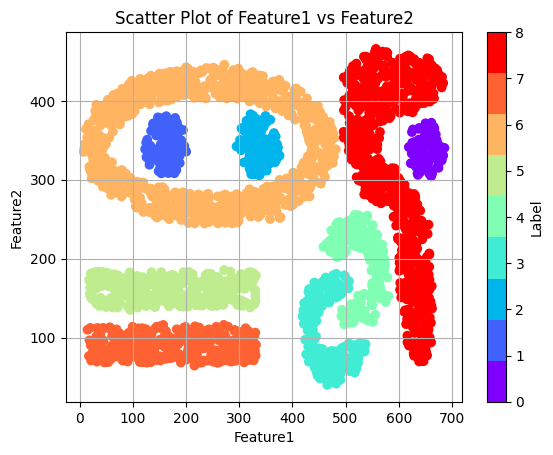

n_estimators RandomForest = 1:
Train Accuracy: 0.88, Test Accuracy: 0.85
Train Precision: 0.88, Test Precision: 0.85
Train Recall: 0.88, Test Recall: 0.85
Train F1-score: 0.88, Test F1-score: 0.85

n_estimators RandomForest = 2:
Train Accuracy: 0.90, Test Accuracy: 0.88
Train Precision: 0.90, Test Precision: 0.88
Train Recall: 0.90, Test Recall: 0.88
Train F1-score: 0.90, Test F1-score: 0.88

n_estimators RandomForest = 5:
Train Accuracy: 0.92, Test Accuracy: 0.90
Train Precision: 0.92, Test Precision: 0.90
Train Recall: 0.92, Test Recall: 0.90
Train F1-score: 0.92, Test F1-score: 0.90

n_estimators RandomForest = 10:
Train Accuracy: 0.92, Test Accuracy: 0.90
Train Precision: 0.92, Test Precision: 0.90
Train Recall: 0.92, Test Recall: 0.90
Train F1-score: 0.92, Test F1-score: 0.90

n_estimators RandomForest = 50:
Train Accuracy: 0.92, Test Accuracy: 0.90
Train Precision: 0.92, Test Precision: 0.90
Train Recall: 0.92, Test Recall: 0.90
Train F1-score: 0.92, Test F1-score: 0.90

n_estima

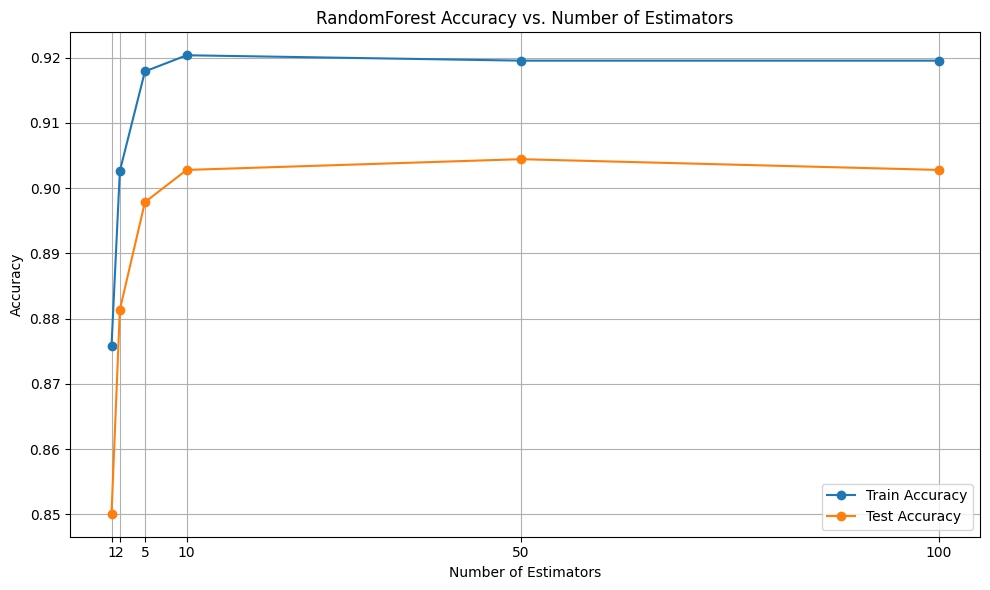

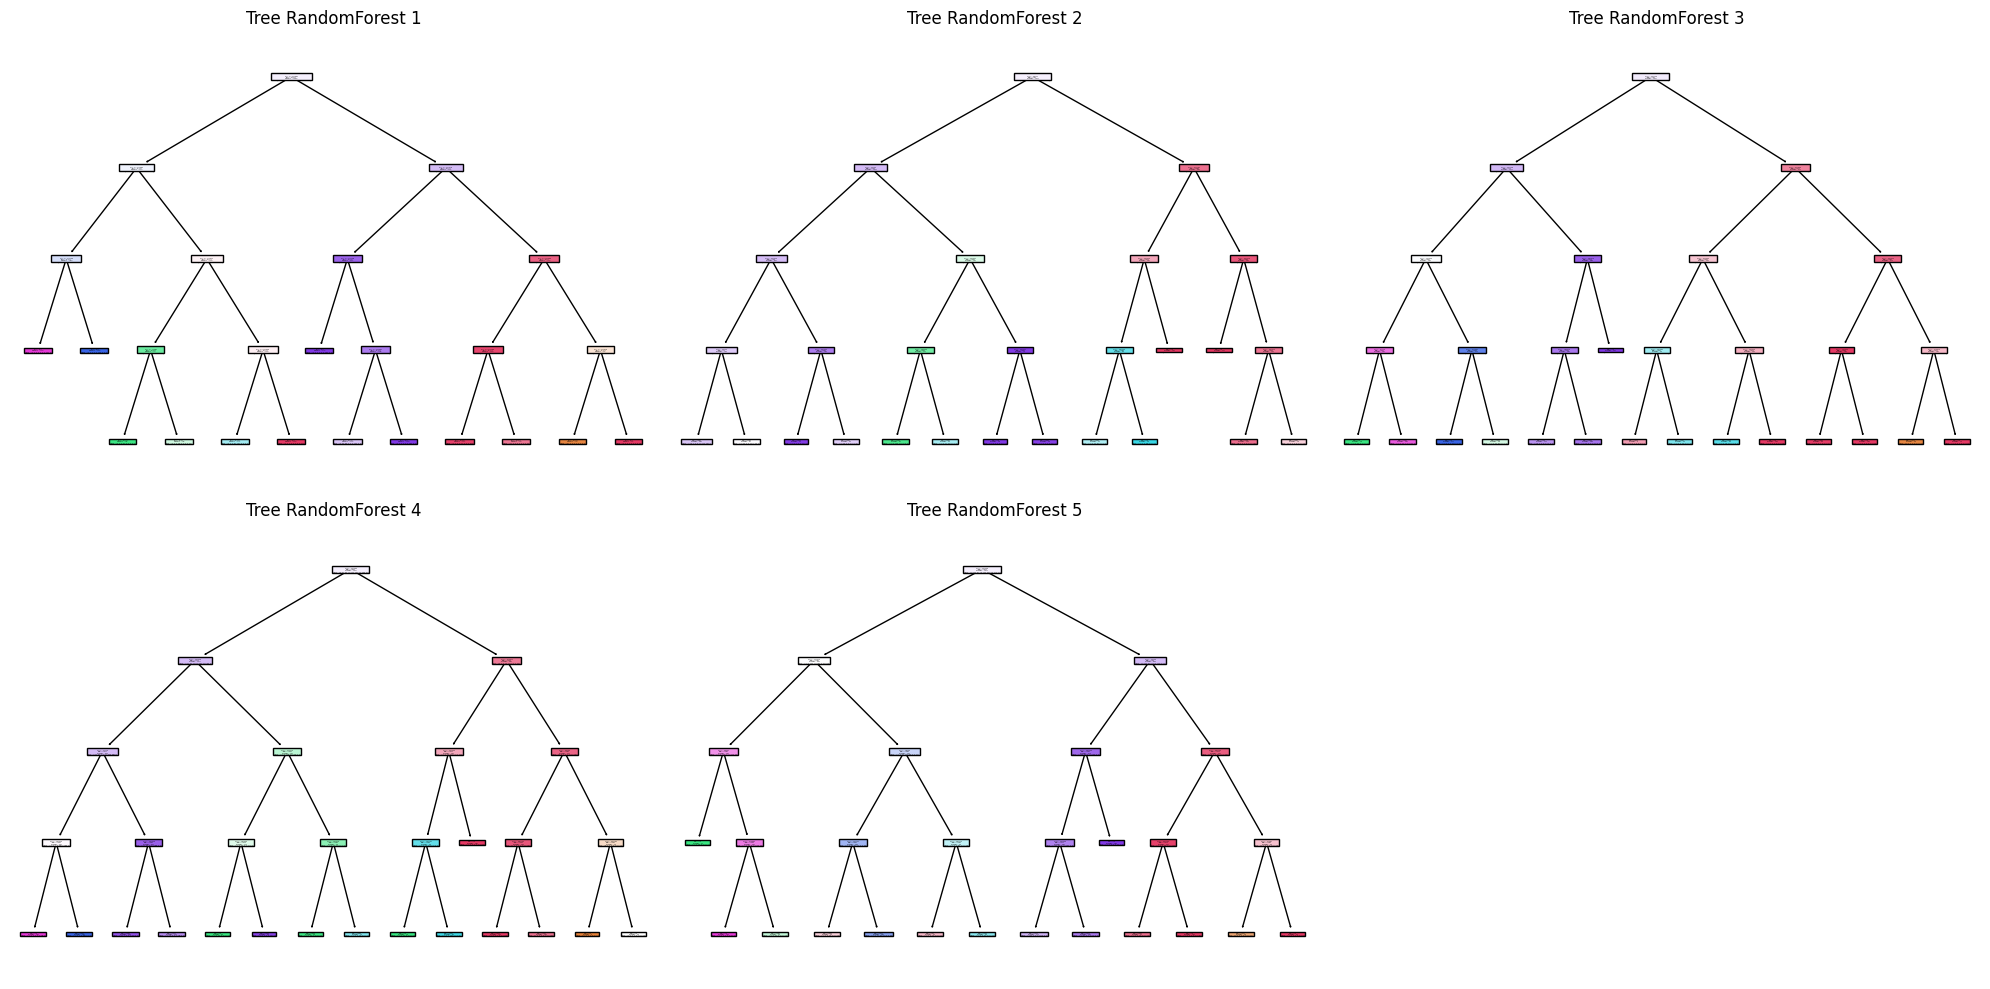

<ipython-input-55-27a5bddb699e>:115: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.get_cmap('rainbow', len(np.unique(y))))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
<ipython-input-55-27a5bddb699e>:115: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.get_cmap('rainbow', len(np.unique(y))))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without f

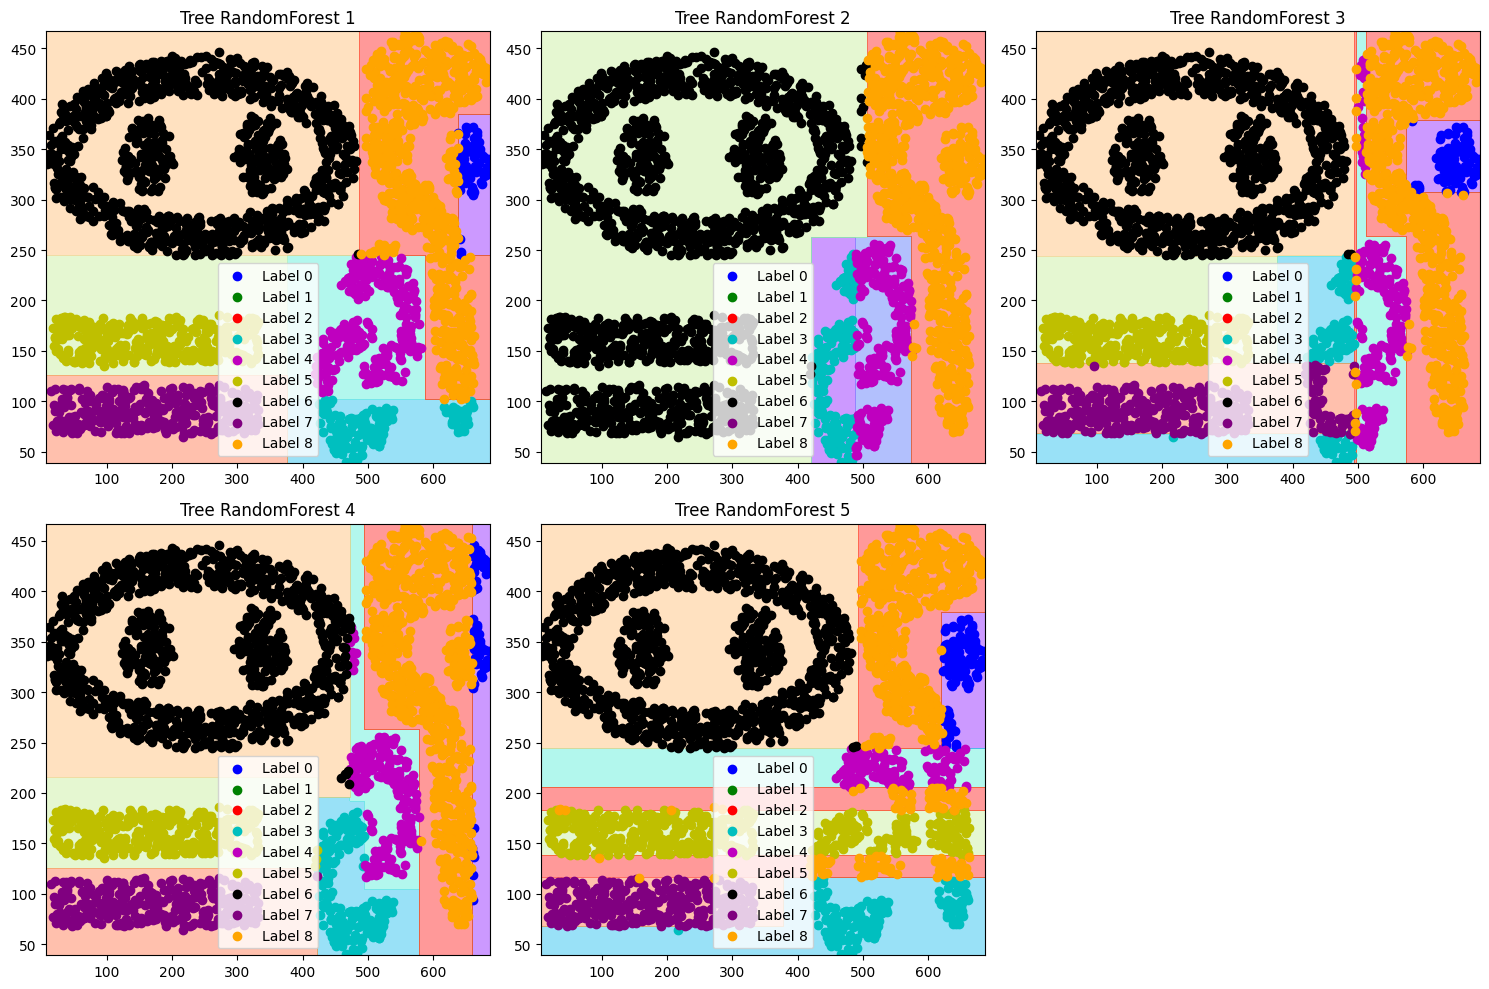

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define 9 different colors
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'purple', 'orange']

# Read data from CSV file
df = pd.read_csv('/content/drive/My Drive/1/Dataset1.csv')

X = df.drop('Label', axis=1)
y = df['Label']

# Scatter plot of Feature 1 vs Feature 2
plt.scatter(df['Feature 1'], df['Feature 2'], c=y, cmap=plt.cm.get_cmap('rainbow', len(np.unique(y))))
plt.title('Scatter Plot of Feature1 vs Feature2')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.grid(True)
plt.colorbar(ticks=range(len(np.unique(y))), label='Label')
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Number of estimators to evaluate
num_estimators = [1, 2, 5, 10, 50, 100]

train_accuracies = []
test_accuracies = []

# Loop to test different numbers of estimators
for n in num_estimators:
    # Create RandomForest model with different numbers of estimators
    rf_clf = RandomForestClassifier(n_estimators=n, max_depth=4, random_state=42)

    # Train the model on training data
    rf_clf.fit(X_train, y_train)

    # Predict labels for training and testing data
    y_train_pred = rf_clf.predict(X_train)
    y_test_pred = rf_clf.predict(X_test)

    # Compute model accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Store accuracies in lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    # Evaluate the model for training and testing data
    train_f1 = f1_score(y_train, y_train_pred, average='micro')
    test_f1 = f1_score(y_test, y_test_pred, average='micro')

    train_precision = precision_score(y_train, y_train_pred, average='micro')
    test_precision = precision_score(y_test, y_test_pred, average='micro')

    train_recall = recall_score(y_train, y_train_pred, average='micro')
    test_recall = recall_score(y_test, y_test_pred, average='micro')

    print(f'n_estimators RandomForest = {n}:')
    print(f'Train Accuracy: {train_accuracy:.2f}, Test Accuracy: {test_accuracy:.2f}')
    print(f'Train Precision: {train_precision:.2f}, Test Precision: {test_precision:.2f}')
    print(f'Train Recall: {train_recall:.2f}, Test Recall: {test_recall:.2f}')
    print(f'Train F1-score: {train_f1:.2f}, Test F1-score: {test_f1:.2f}')
    print()

# Plot RandomForest accuracy versus number of estimators
plt.figure(figsize=(10, 6))
plt.plot(num_estimators, train_accuracies, marker='o', label='Train Accuracy')
plt.plot(num_estimators, test_accuracies, marker='o', label='Test Accuracy')
plt.title('RandomForest Accuracy vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.xticks(num_estimators)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Display five random trees from the model
plt.figure(figsize=(20, 10))
for i in range(5):
    plt.subplot(2, 3, i + 1)

    # Plot the tree
    plot_tree(rf_clf.estimators_[i], filled=True)  # Use plot_tree to plot the tree
    plt.title(f'Tree RandomForest {i + 1}')

plt.tight_layout()
plt.show()

# Plot decision boundaries
plt.figure(figsize=(15, 10))

# Create a mesh grid
x_min, x_max = X['Feature 1'].min() - 1, X['Feature 1'].max() + 1
y_min, y_max = X['Feature 2'].min() - 1, X['Feature 2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

for i in range(5):
    plt.subplot(2, 3, i + 1)

    # Predict the class for each point in the mesh grid
    Z = rf_clf.estimators_[i].predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundaries
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.get_cmap('rainbow', len(np.unique(y))))

    # Plot original data points with predicted labels
    y_pred_tree = rf_clf.estimators_[i].predict(X)
    for label in np.unique(y):
        plt.scatter(X[y_pred_tree == label]['Feature 1'], X[y_pred_tree == label]['Feature 2'],
                    color=colors[label], label=f'Label {label}')

    plt.title(f'Tree RandomForest {i + 1}')
    plt.legend()

plt.tight_layout()
plt.show()


## Adaboost

<ipython-input-56-9d42626d182c>:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(df['Feature 1'], df['Feature 2'], c=y, cmap=plt.cm.get_cmap('rainbow', len(np.unique(y))))


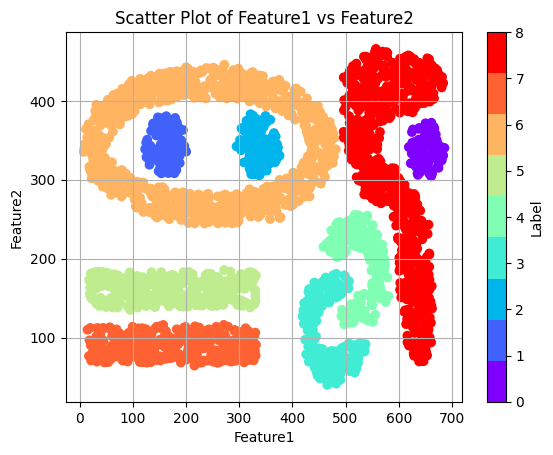

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


n_estimators AdaBoost = 1:
Train Accuracy: 0.75, Test Accuracy: 0.72
Train Precision: 0.75, Test Precision: 0.72
Train Recall: 0.75, Test Recall: 0.72
Train F1-score: 0.75, Test F1-score: 0.72

n_estimators AdaBoost = 2:
Train Accuracy: 0.83, Test Accuracy: 0.81
Train Precision: 0.83, Test Precision: 0.81
Train Recall: 0.83, Test Recall: 0.81
Train F1-score: 0.83, Test F1-score: 0.81

n_estimators AdaBoost = 5:
Train Accuracy: 0.97, Test Accuracy: 0.97
Train Precision: 0.97, Test Precision: 0.97
Train Recall: 0.97, Test Recall: 0.97
Train F1-score: 0.97, Test F1-score: 0.97

n_estimators AdaBoost = 10:
Train Accuracy: 0.95, Test Accuracy: 0.96
Train Precision: 0.95, Test Precision: 0.96
Train Recall: 0.95, Test Recall: 0.96
Train F1-score: 0.95, Test F1-score: 0.96



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


n_estimators AdaBoost = 50:
Train Accuracy: 1.00, Test Accuracy: 1.00
Train Precision: 1.00, Test Precision: 1.00
Train Recall: 1.00, Test Recall: 1.00
Train F1-score: 1.00, Test F1-score: 1.00



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


n_estimators AdaBoost = 100:
Train Accuracy: 1.00, Test Accuracy: 0.99
Train Precision: 1.00, Test Precision: 0.99
Train Recall: 1.00, Test Recall: 0.99
Train F1-score: 1.00, Test F1-score: 0.99



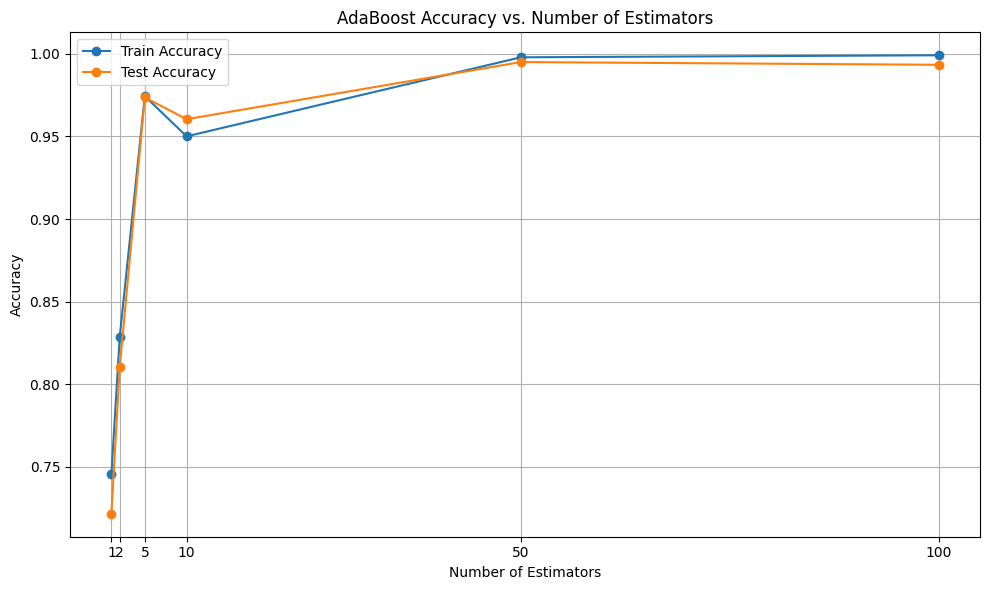

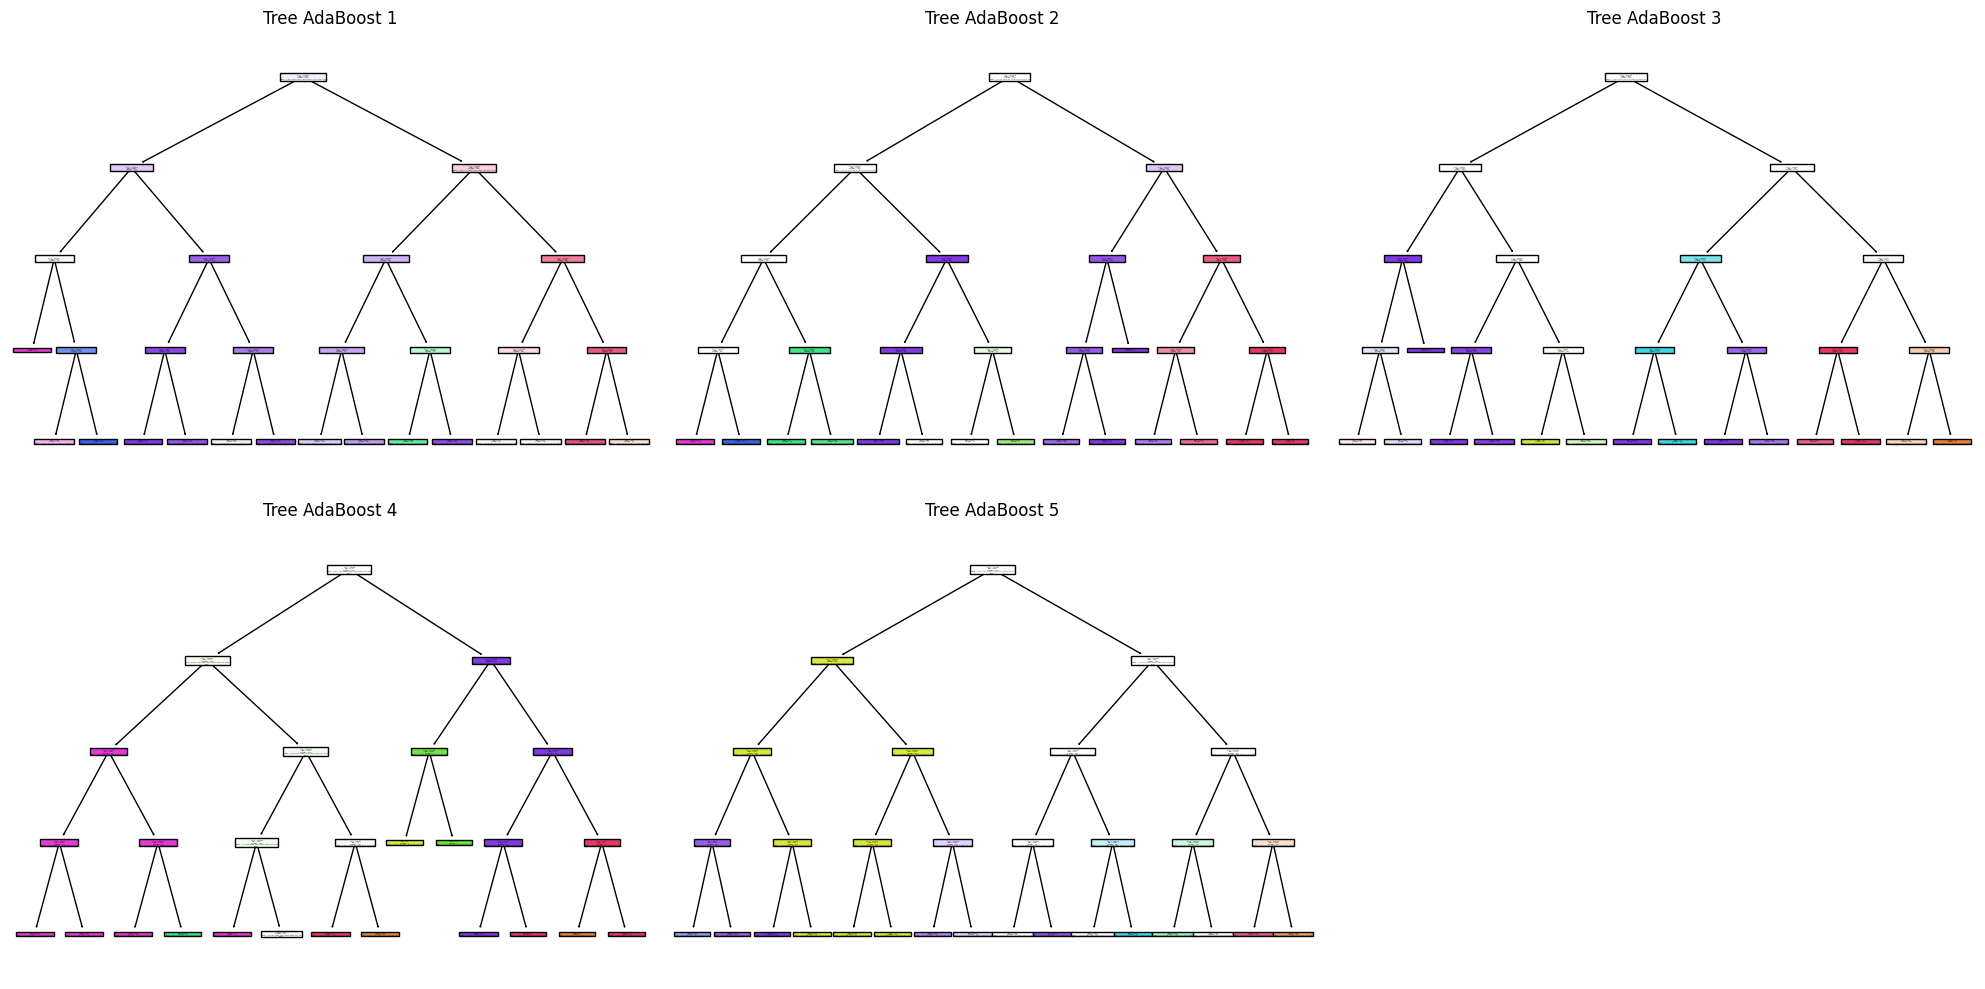

<ipython-input-56-9d42626d182c>:116: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.get_cmap('rainbow', len(np.unique(y))))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
<ipython-input-56-9d42626d182c>:116: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.get_cmap('rainbow', len(np.unique(y))))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without f

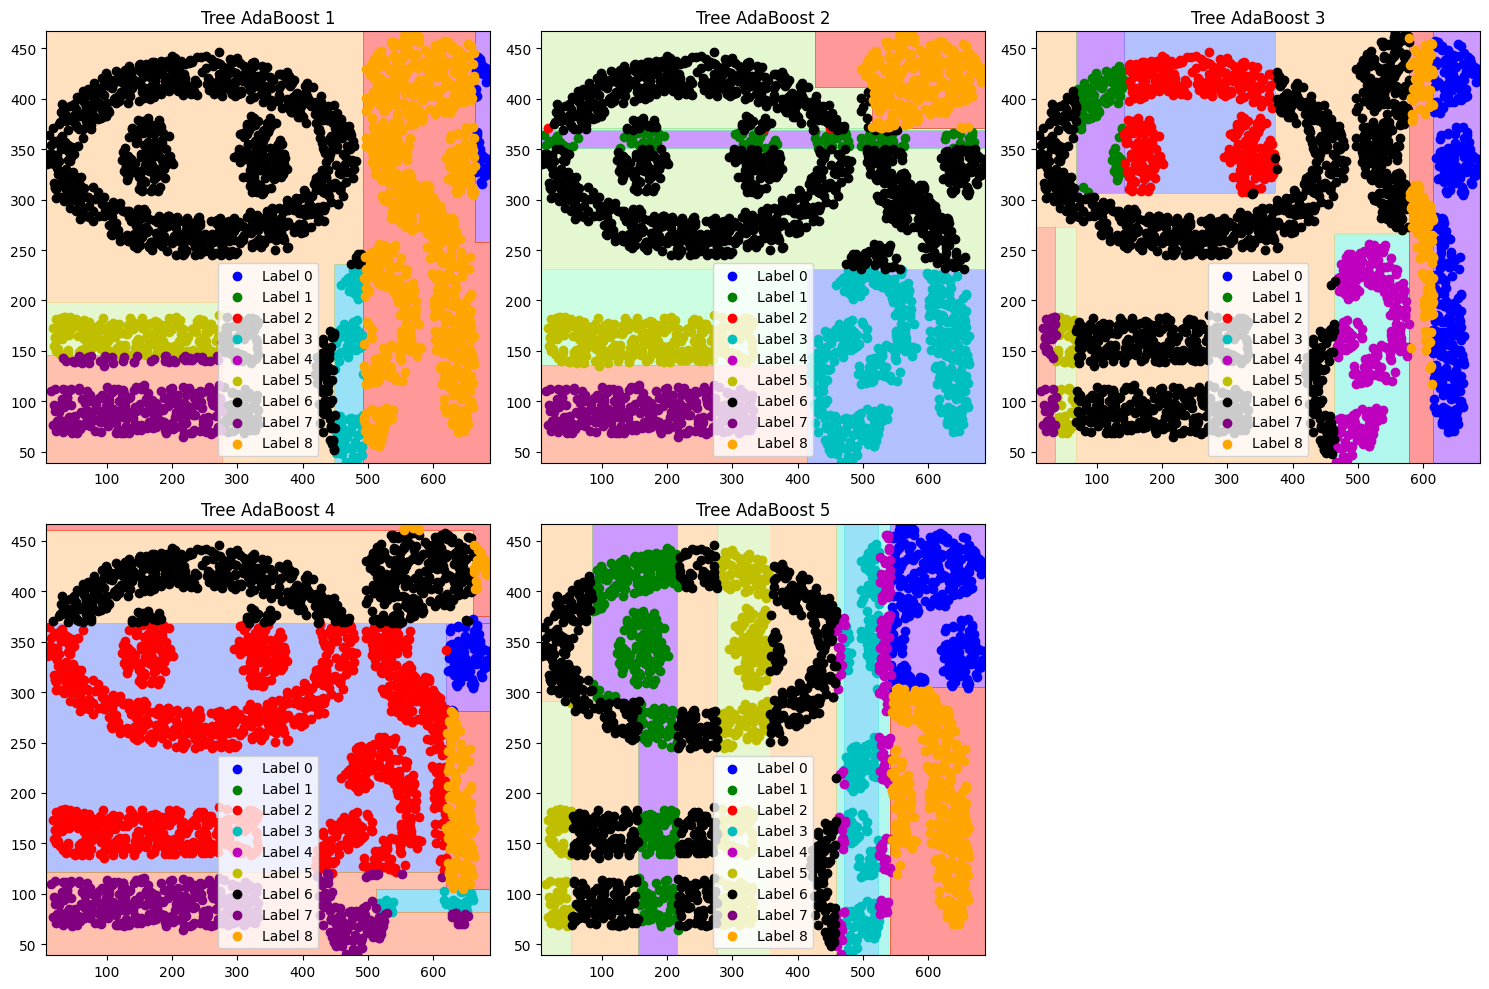

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define 9 different colors
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'purple', 'orange']

# Read data from CSV file
df = pd.read_csv('/content/drive/My Drive/1/Dataset1.csv')

X = df.drop('Label', axis=1)
y = df['Label']

# Scatter plot of Feature 1 vs Feature 2
plt.scatter(df['Feature 1'], df['Feature 2'], c=y, cmap=plt.cm.get_cmap('rainbow', len(np.unique(y))))
plt.title('Scatter Plot of Feature1 vs Feature2')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.grid(True)
plt.colorbar(ticks=range(len(np.unique(y))), label='Label')
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Number of estimators to evaluate
num_estimators = [1, 2, 5, 10, 50, 100]

train_accuracies = []
test_accuracies = []

# Loop to test different numbers of estimators
for n in num_estimators:
    # Create AdaBoost model with different numbers of estimators
    ada_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'),
                                 n_estimators=n, random_state=42)

    # Train the model on training data
    ada_clf.fit(X_train, y_train)

    # Predict labels for training and testing data
    y_train_pred = ada_clf.predict(X_train)
    y_test_pred = ada_clf.predict(X_test)

    # Compute model accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Store accuracies in lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    # Evaluate the model for training and testing data
    train_f1 = f1_score(y_train, y_train_pred, average='micro')
    test_f1 = f1_score(y_test, y_test_pred, average='micro')

    train_precision = precision_score(y_train, y_train_pred, average='micro')
    test_precision = precision_score(y_test, y_test_pred, average='micro')

    train_recall = recall_score(y_train, y_train_pred, average='micro')
    test_recall = recall_score(y_test, y_test_pred, average='micro')

    print(f'n_estimators AdaBoost = {n}:')
    print(f'Train Accuracy: {train_accuracy:.2f}, Test Accuracy: {test_accuracy:.2f}')
    print(f'Train Precision: {train_precision:.2f}, Test Precision: {test_precision:.2f}')
    print(f'Train Recall: {train_recall:.2f}, Test Recall: {test_recall:.2f}')
    print(f'Train F1-score: {train_f1:.2f}, Test F1-score: {test_f1:.2f}')
    print()

# Plot AdaBoost accuracy versus number of estimators
plt.figure(figsize=(10, 6))
plt.plot(num_estimators, train_accuracies, marker='o', label='Train Accuracy')
plt.plot(num_estimators, test_accuracies, marker='o', label='Test Accuracy')
plt.title('AdaBoost Accuracy vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.xticks(num_estimators)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Display five random trees from the model
plt.figure(figsize=(20, 10))
for i in range(5):
    plt.subplot(2, 3, i + 1)

    # Plot the tree
    plot_tree(ada_clf.estimators_[i], filled=True)  # Use plot_tree to plot the tree
    plt.title(f'Tree AdaBoost {i + 1}')

plt.tight_layout()
plt.show()

# Plot decision boundaries
plt.figure(figsize=(15, 10))

# Create a mesh grid
x_min, x_max = X['Feature 1'].min() - 1, X['Feature 1'].max() + 1
y_min, y_max = X['Feature 2'].min() - 1, X['Feature 2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

for i in range(5):
    plt.subplot(2, 3, i + 1)

    # Predict the class for each point in the mesh grid
    Z = ada_clf.estimators_[i].predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundaries
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.get_cmap('rainbow', len(np.unique(y))))

    # Plot original data points with predicted labels
    y_pred_tree = ada_clf.estimators_[i].predict(X)
    for label in np.unique(y):
        plt.scatter(X[y_pred_tree == label]['Feature 1'], X[y_pred_tree == label]['Feature 2'],
                    color=colors[label], label=f'Label {label}')

    plt.title(f'Tree AdaBoost {i + 1}')
    plt.legend()

plt.tight_layout()
plt.show()


## Stacked Learning

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
df = pd.read_csv('/content/drive/My Drive/1/Dataset1.csv')

X = df.drop('Label', axis=1)
y = df['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base classifiers
base_classifiers = {
    'knn': KNeighborsClassifier(n_neighbors=3),
    'decision_tree': DecisionTreeClassifier(max_depth=4, random_state=42),
    'random_forest': RandomForestClassifier(n_estimators=10, max_depth=4, random_state=42),
    'adaboost': AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4), n_estimators=10, random_state=42)
}

# Train base classifiers
for name, clf in base_classifiers.items():
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    print(f'{name} - Train Accuracy: {accuracy_score(y_train, y_train_pred):.2f}, Test Accuracy: {accuracy_score(y_test, y_test_pred):.2f}')

# Create new features for the meta-classifier
meta_features_train = np.column_stack([clf.predict(X_train) for clf in base_classifiers.values()])
meta_features_test = np.column_stack([clf.predict(X_test) for clf in base_classifiers.values()])

# Define and train the meta-classifier
meta_classifier = DecisionTreeClassifier(max_depth=4, random_state=42)
meta_classifier.fit(meta_features_train, y_train)

# Evaluate the stacked model
y_train_pred_meta = meta_classifier.predict(meta_features_train)
y_test_pred_meta = meta_classifier.predict(meta_features_test)

train_accuracy = accuracy_score(y_train, y_train_pred_meta)
test_accuracy = accuracy_score(y_test, y_test_pred_meta)

train_precision = precision_score(y_train, y_train_pred_meta, average='micro')
test_precision = precision_score(y_test, y_test_pred_meta, average='micro')

train_recall = recall_score(y_train, y_train_pred_meta, average='micro')
test_recall = recall_score(y_test, y_test_pred_meta, average='micro')

train_f1 = f1_score(y_train, y_train_pred_meta, average='micro')
test_f1 = f1_score(y_test, y_test_pred_meta, average='micro')

print(f'Stacked Model:')
print(f'Train Accuracy: {train_accuracy:.2f}, Test Accuracy: {test_accuracy:.2f}')
print(f'Train Precision: {train_precision:.2f}, Test Precision: {test_precision:.2f}')
print(f'Train Recall: {train_recall:.2f}, Test Recall: {test_recall:.2f}')
print(f'Train F1-score: {train_f1:.2f}, Test F1-score: {test_f1:.2f}')


knn - Train Accuracy: 1.00, Test Accuracy: 1.00
decision_tree - Train Accuracy: 0.91, Test Accuracy: 0.89
random_forest - Train Accuracy: 0.92, Test Accuracy: 0.90
adaboost - Train Accuracy: 1.00, Test Accuracy: 0.99


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Stacked Model:
Train Accuracy: 0.90, Test Accuracy: 0.89
Train Precision: 0.90, Test Precision: 0.89
Train Recall: 0.90, Test Recall: 0.89
Train F1-score: 0.90, Test F1-score: 0.89


# Phase 2

## Preprocess

In [58]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/1/Dataset2.csv')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [60]:
df['education'].unique()

array([ 4.,  2.,  1.,  3., nan])

In [61]:
# Calculate the mode of the column
mode_value = df['education'].mode()[0]

# Fill NaN values with the mode
df['education'].fillna(mode_value, inplace=True)

In [62]:
df['cigsPerDay'].unique()

array([ 0., 20., 30., 23., 15.,  9., 10.,  5., 35., 43.,  1., 40.,  3.,
        2., nan, 12.,  4., 18., 25., 60., 14., 45.,  8., 50., 13., 11.,
        7.,  6., 38., 29., 17., 16., 19., 70.])

In [63]:
# Calculate the median of the column
median_value = df['cigsPerDay'].median()

# Fill NaN values with the median
df['cigsPerDay'].fillna(median_value, inplace=True)

In [64]:
df['BPMeds'].unique()

array([ 0.,  1., nan])

In [65]:
df = df.dropna(subset=['BPMeds'])

In [66]:
# Calculate the median of the column
median_value = df['totChol'].median()

# Fill NaN values with the median
df['totChol'].fillna(median_value, inplace=True)

<ipython-input-66-6f836d55e12c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['totChol'].fillna(median_value, inplace=True)


In [67]:
# Calculate the median of the column
mean_value = df['BMI'].mean()

# Fill NaN values with the median
df['BMI'].fillna(mean_value, inplace=True)

<ipython-input-67-a33f1e4e780a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BMI'].fillna(mean_value, inplace=True)


In [68]:
# Calculate the median of the column
median_value = df['heartRate'].median()

# Fill NaN values with the median
df['heartRate'].fillna(median_value, inplace=True)

<ipython-input-68-25274b80e945>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['heartRate'].fillna(median_value, inplace=True)


In [69]:
# Calculate the median of the column
median_value = df['glucose'].median()

# Fill NaN values with the median
df['glucose'].fillna(median_value, inplace=True)

<ipython-input-69-3502970513b1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['glucose'].fillna(median_value, inplace=True)


In [70]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [71]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

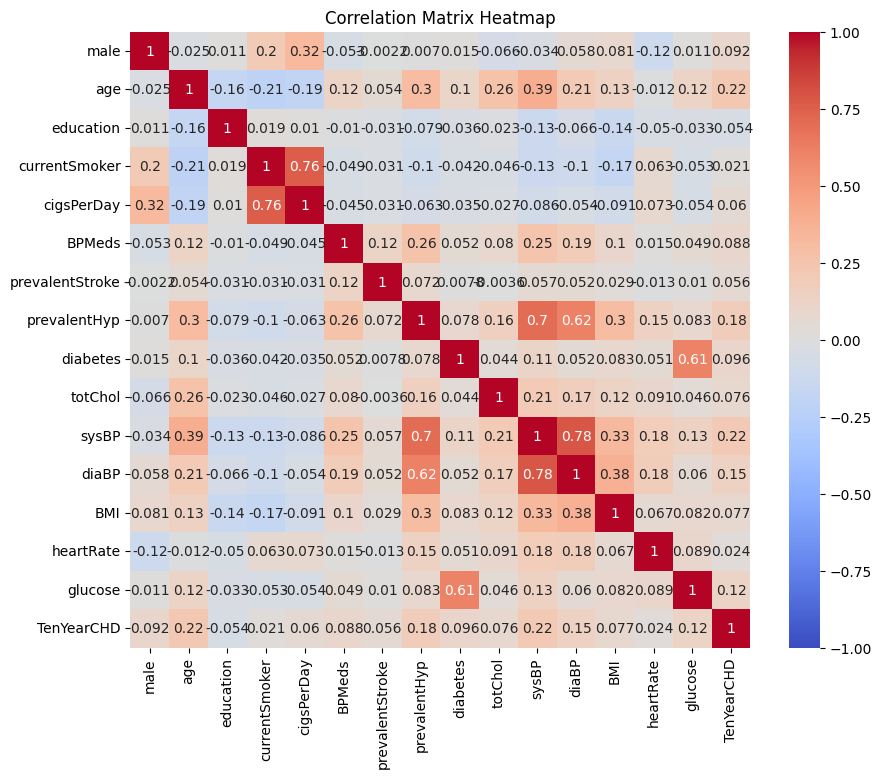

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)

# Add title and labels
plt.title('Correlation Matrix Heatmap')
plt.show()

In [73]:
columns_to_drop = set()

# Iterate through the correlation matrix
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            column_to_drop = correlation_matrix.columns[i]
            columns_to_drop.add(column_to_drop)

# Create a new DataFrame with only the columns that have low correlation
df_low_corr = df.drop(columns=columns_to_drop)

print("Columns to drop due to high correlation:")
print(columns_to_drop)
print("\nDataFrame with only low correlated columns:")
print(df_low_corr)

Columns to drop due to high correlation:
{'cigsPerDay', 'diaBP'}

DataFrame with only low correlated columns:
      male  age  education  currentSmoker  BPMeds  prevalentStroke  \
0        1   39        4.0              0     0.0                0   
1        0   46        2.0              0     0.0                0   
2        1   48        1.0              1     0.0                0   
3        0   61        3.0              1     0.0                0   
4        0   46        3.0              1     0.0                0   
...    ...  ...        ...            ...     ...              ...   
4234     1   51        3.0              1     0.0                0   
4236     0   44        1.0              1     0.0                0   
4237     0   52        2.0              0     0.0                0   
4238     1   40        3.0              0     0.0                0   
4239     0   39        3.0              1     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP    B

In [74]:
df_low_corr

,male,age,education,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0,0,0,195.0,106.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0,0,0,250.0,121.0,28.73,95.0,76.0,0
2,1,48,1.0,1,0.0,0,0,0,245.0,127.5,25.34,75.0,70.0,0
3,0,61,3.0,1,0.0,0,1,0,225.0,150.0,28.58,65.0,103.0,1
4,0,46,3.0,1,0.0,0,0,0,285.0,130.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4234,1,51,3.0,1,0.0,0,0,0,207.0,126.5,19.71,65.0,68.0,0
4236,0,44,1.0,1,0.0,0,0,0,210.0,126.5,19.16,86.0,78.0,0
4237,0,52,2.0,0,0.0,0,0,0,269.0,133.5,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0,1,0,185.0,141.0,25.60,67.0,72.0,0


## Bagging

n_estimators Bagging = 1:
Train Accuracy: 0.86, Test Accuracy: 0.83
Train Precision: 0.86, Test Precision: 0.83
Train Recall: 0.86, Test Recall: 0.83
Train F1-score: 0.86, Test F1-score: 0.83

n_estimators Bagging = 2:
Train Accuracy: 0.86, Test Accuracy: 0.83
Train Precision: 0.86, Test Precision: 0.83
Train Recall: 0.86, Test Recall: 0.83
Train F1-score: 0.86, Test F1-score: 0.83



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


n_estimators Bagging = 5:
Train Accuracy: 0.86, Test Accuracy: 0.83
Train Precision: 0.86, Test Precision: 0.83
Train Recall: 0.86, Test Recall: 0.83
Train F1-score: 0.86, Test F1-score: 0.83

n_estimators Bagging = 10:
Train Accuracy: 0.86, Test Accuracy: 0.83
Train Precision: 0.86, Test Precision: 0.83
Train Recall: 0.86, Test Recall: 0.83
Train F1-score: 0.86, Test F1-score: 0.83

n_estimators Bagging = 50:
Train Accuracy: 0.86, Test Accuracy: 0.83
Train Precision: 0.86, Test Precision: 0.83
Train Recall: 0.86, Test Recall: 0.83
Train F1-score: 0.86, Test F1-score: 0.83



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


n_estimators Bagging = 100:
Train Accuracy: 0.86, Test Accuracy: 0.83
Train Precision: 0.86, Test Precision: 0.83
Train Recall: 0.86, Test Recall: 0.83
Train F1-score: 0.86, Test F1-score: 0.83



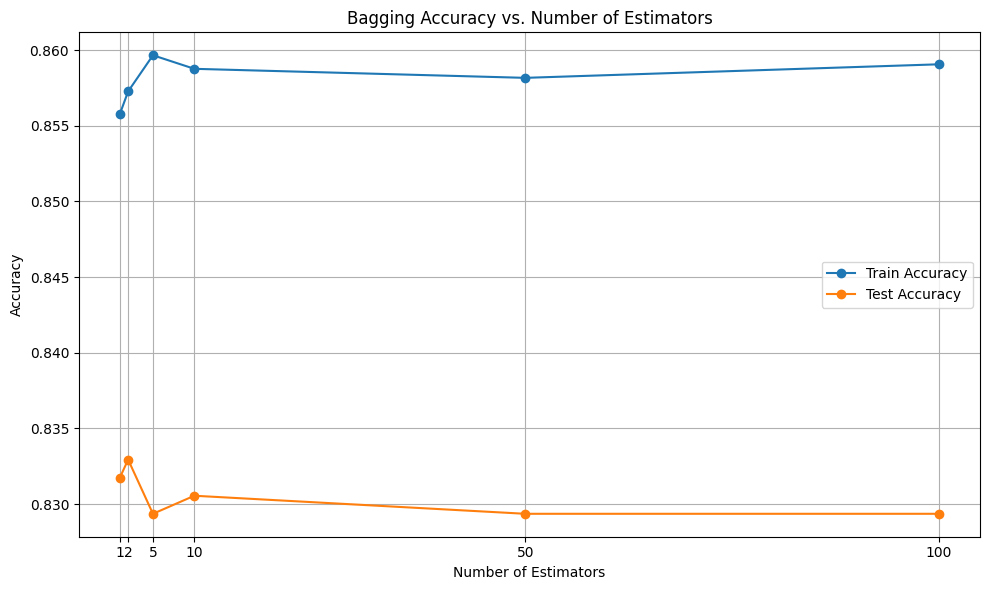

In [75]:
# Define 9 different colors
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'purple', 'orange']


X = df_low_corr.drop('TenYearCHD', axis=1)
y = df_low_corr['TenYearCHD']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Number of estimators to evaluate
num_estimators = [1, 2, 5, 10, 50, 100]

train_accuracies = []
test_accuracies = []

# Loop to test different numbers of estimators
for n in num_estimators:
    # Create Bagging model with different numbers of estimators
    bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'),
                                    n_estimators=n,
                                    random_state=42)
    # Train the model on training data
    bagging_clf.fit(X_train, y_train)

    # Predict labels for training and testing data
    y_train_pred = bagging_clf.predict(X_train)
    y_test_pred = bagging_clf.predict(X_test)

    # Compute model accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Store accuracies in lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    # Evaluate the model for training and testing data
    train_f1 = f1_score(y_train, y_train_pred, average='micro')
    test_f1 = f1_score(y_test, y_test_pred, average='micro')

    train_precision = precision_score(y_train, y_train_pred, average='micro')
    test_precision = precision_score(y_test, y_test_pred, average='micro')

    train_recall = recall_score(y_train, y_train_pred, average='micro')
    test_recall = recall_score(y_test, y_test_pred, average='micro')

    print(f'n_estimators Bagging = {n}:')
    print(f'Train Accuracy: {train_accuracy:.2f}, Test Accuracy: {test_accuracy:.2f}')
    print(f'Train Precision: {train_precision:.2f}, Test Precision: {test_precision:.2f}')
    print(f'Train Recall: {train_recall:.2f}, Test Recall: {test_recall:.2f}')
    print(f'Train F1-score: {train_f1:.2f}, Test F1-score: {test_f1:.2f}')
    print()

# Plot Bagging accuracy versus number of estimators
plt.figure(figsize=(10, 6))
plt.plot(num_estimators, train_accuracies, marker='o', label='Train Accuracy')
plt.plot(num_estimators, test_accuracies, marker='o', label='Test Accuracy')
plt.title('Bagging Accuracy vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.xticks(num_estimators)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## RandomForest

n_estimators RandomForest = 1:
Train Accuracy: 0.86, Test Accuracy: 0.83
Train Precision: 0.86, Test Precision: 0.83
Train Recall: 0.86, Test Recall: 0.83
Train F1-score: 0.86, Test F1-score: 0.83

n_estimators RandomForest = 2:
Train Accuracy: 0.86, Test Accuracy: 0.82
Train Precision: 0.86, Test Precision: 0.82
Train Recall: 0.86, Test Recall: 0.82
Train F1-score: 0.86, Test F1-score: 0.82

n_estimators RandomForest = 5:
Train Accuracy: 0.86, Test Accuracy: 0.83
Train Precision: 0.86, Test Precision: 0.83
Train Recall: 0.86, Test Recall: 0.83
Train F1-score: 0.86, Test F1-score: 0.83

n_estimators RandomForest = 10:
Train Accuracy: 0.86, Test Accuracy: 0.83
Train Precision: 0.86, Test Precision: 0.83
Train Recall: 0.86, Test Recall: 0.83
Train F1-score: 0.86, Test F1-score: 0.83

n_estimators RandomForest = 50:
Train Accuracy: 0.86, Test Accuracy: 0.83
Train Precision: 0.86, Test Precision: 0.83
Train Recall: 0.86, Test Recall: 0.83
Train F1-score: 0.86, Test F1-score: 0.83

n_estima

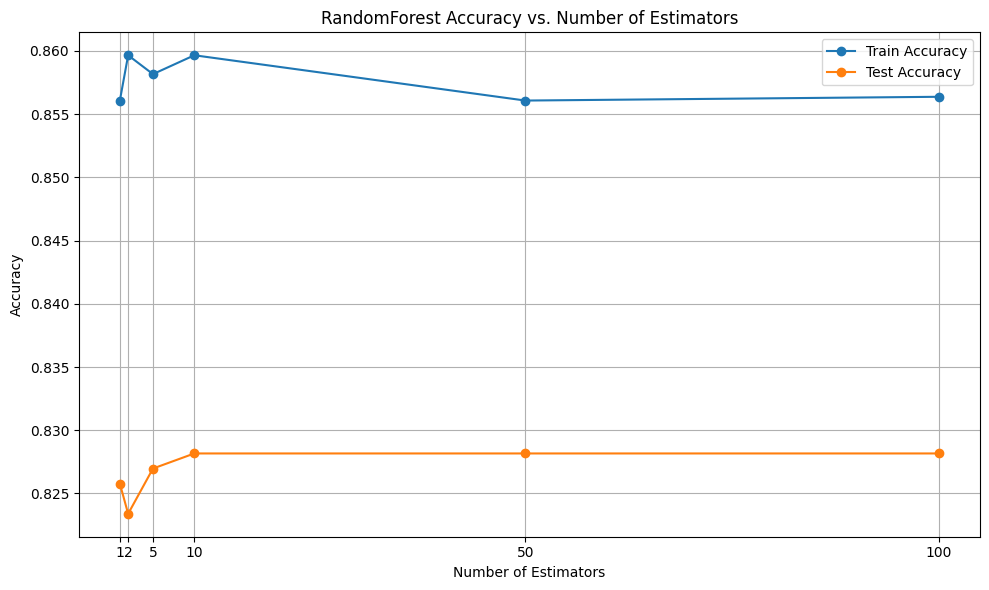

In [76]:

# Define 9 different colors
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'purple', 'orange']



X = df_low_corr.drop('TenYearCHD', axis=1)
y = df_low_corr['TenYearCHD']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Number of estimators to evaluate
num_estimators = [1, 2, 5, 10, 50, 100]

train_accuracies = []
test_accuracies = []

# Loop to test different numbers of estimators
for n in num_estimators:
    # Create RandomForest model with different numbers of estimators
    rf_clf = RandomForestClassifier(n_estimators=n, max_depth=4, random_state=42)

    # Train the model on training data
    rf_clf.fit(X_train, y_train)

    # Predict labels for training and testing data
    y_train_pred = rf_clf.predict(X_train)
    y_test_pred = rf_clf.predict(X_test)

    # Compute model accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Store accuracies in lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    # Evaluate the model for training and testing data
    train_f1 = f1_score(y_train, y_train_pred, average='micro')
    test_f1 = f1_score(y_test, y_test_pred, average='micro')

    train_precision = precision_score(y_train, y_train_pred, average='micro')
    test_precision = precision_score(y_test, y_test_pred, average='micro')

    train_recall = recall_score(y_train, y_train_pred, average='micro')
    test_recall = recall_score(y_test, y_test_pred, average='micro')

    print(f'n_estimators RandomForest = {n}:')
    print(f'Train Accuracy: {train_accuracy:.2f}, Test Accuracy: {test_accuracy:.2f}')
    print(f'Train Precision: {train_precision:.2f}, Test Precision: {test_precision:.2f}')
    print(f'Train Recall: {train_recall:.2f}, Test Recall: {test_recall:.2f}')
    print(f'Train F1-score: {train_f1:.2f}, Test F1-score: {test_f1:.2f}')
    print()

# Plot RandomForest accuracy versus number of estimators
plt.figure(figsize=(10, 6))
plt.plot(num_estimators, train_accuracies, marker='o', label='Train Accuracy')
plt.plot(num_estimators, test_accuracies, marker='o', label='Test Accuracy')
plt.title('RandomForest Accuracy vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.xticks(num_estimators)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



## Adaboost

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


n_estimators AdaBoost = 1:
Train Accuracy: 0.86, Test Accuracy: 0.82
Train Precision: 0.86, Test Precision: 0.82
Train Recall: 0.86, Test Recall: 0.82
Train F1-score: 0.86, Test F1-score: 0.82

n_estimators AdaBoost = 2:
Train Accuracy: 0.86, Test Accuracy: 0.82
Train Precision: 0.86, Test Precision: 0.82
Train Recall: 0.86, Test Recall: 0.82
Train F1-score: 0.86, Test F1-score: 0.82

n_estimators AdaBoost = 5:
Train Accuracy: 0.86, Test Accuracy: 0.82
Train Precision: 0.86, Test Precision: 0.82
Train Recall: 0.86, Test Recall: 0.82
Train F1-score: 0.86, Test F1-score: 0.82

n_estimators AdaBoost = 10:
Train Accuracy: 0.87, Test Accuracy: 0.81
Train Precision: 0.87, Test Precision: 0.81
Train Recall: 0.87, Test Recall: 0.81
Train F1-score: 0.87, Test F1-score: 0.81

n_estimators AdaBoost = 50:
Train Accuracy: 0.91, Test Accuracy: 0.80
Train Precision: 0.91, Test Precision: 0.80
Train Recall: 0.91, Test Recall: 0.80
Train F1-score: 0.91, Test F1-score: 0.80



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


n_estimators AdaBoost = 100:
Train Accuracy: 0.96, Test Accuracy: 0.78
Train Precision: 0.96, Test Precision: 0.78
Train Recall: 0.96, Test Recall: 0.78
Train F1-score: 0.96, Test F1-score: 0.78



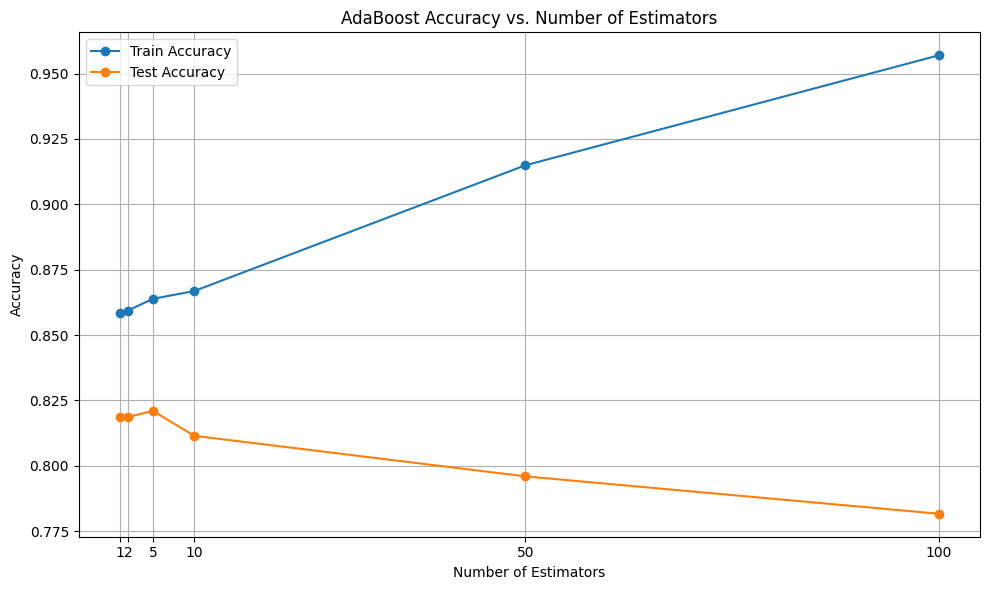

In [77]:

# Define 9 different colors
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'purple', 'orange']



X = df_low_corr.drop('TenYearCHD', axis=1)
y = df_low_corr['TenYearCHD']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Number of estimators to evaluate
num_estimators = [1, 2, 5, 10, 50, 100]

train_accuracies = []
test_accuracies = []

# Loop to test different numbers of estimators
for n in num_estimators:
    # Create AdaBoost model with different numbers of estimators
    ada_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4, splitter='random'),
                                 n_estimators=n, random_state=42)

    # Train the model on training data
    ada_clf.fit(X_train, y_train)

    # Predict labels for training and testing data
    y_train_pred = ada_clf.predict(X_train)
    y_test_pred = ada_clf.predict(X_test)

    # Compute model accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Store accuracies in lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    # Evaluate the model for training and testing data
    train_f1 = f1_score(y_train, y_train_pred, average='micro')
    test_f1 = f1_score(y_test, y_test_pred, average='micro')

    train_precision = precision_score(y_train, y_train_pred, average='micro')
    test_precision = precision_score(y_test, y_test_pred, average='micro')

    train_recall = recall_score(y_train, y_train_pred, average='micro')
    test_recall = recall_score(y_test, y_test_pred, average='micro')

    print(f'n_estimators AdaBoost = {n}:')
    print(f'Train Accuracy: {train_accuracy:.2f}, Test Accuracy: {test_accuracy:.2f}')
    print(f'Train Precision: {train_precision:.2f}, Test Precision: {test_precision:.2f}')
    print(f'Train Recall: {train_recall:.2f}, Test Recall: {test_recall:.2f}')
    print(f'Train F1-score: {train_f1:.2f}, Test F1-score: {test_f1:.2f}')
    print()

# Plot AdaBoost accuracy versus number of estimators
plt.figure(figsize=(10, 6))
plt.plot(num_estimators, train_accuracies, marker='o', label='Train Accuracy')
plt.plot(num_estimators, test_accuracies, marker='o', label='Test Accuracy')
plt.title('AdaBoost Accuracy vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.xticks(num_estimators)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



## Stacked Learner

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X = df_low_corr.drop('TenYearCHD', axis=1)
y = df_low_corr['TenYearCHD']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base classifiers
base_classifiers = {
    'knn': KNeighborsClassifier(n_neighbors=3),
    'decision_tree': DecisionTreeClassifier(max_depth=4, random_state=42),
    'random_forest': RandomForestClassifier(n_estimators=10, max_depth=4, random_state=42),
    'adaboost': AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4), n_estimators=10, random_state=42)
}

# Train base classifiers
for name, clf in base_classifiers.items():
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    print(f'{name} - Train Accuracy: {accuracy_score(y_train, y_train_pred):.2f}, Test Accuracy: {accuracy_score(y_test, y_test_pred):.2f}')

# Create new features for the meta-classifier
meta_features_train = np.column_stack([clf.predict(X_train) for clf in base_classifiers.values()])
meta_features_test = np.column_stack([clf.predict(X_test) for clf in base_classifiers.values()])

# Define and train the meta-classifier
meta_classifier = DecisionTreeClassifier(max_depth=4, random_state=42)
meta_classifier.fit(meta_features_train, y_train)

# Evaluate the stacked model
y_train_pred_meta = meta_classifier.predict(meta_features_train)
y_test_pred_meta = meta_classifier.predict(meta_features_test)

train_accuracy = accuracy_score(y_train, y_train_pred_meta)
test_accuracy = accuracy_score(y_test, y_test_pred_meta)

train_precision = precision_score(y_train, y_train_pred_meta, average='micro')
test_precision = precision_score(y_test, y_test_pred_meta, average='micro')

train_recall = recall_score(y_train, y_train_pred_meta, average='micro')
test_recall = recall_score(y_test, y_test_pred_meta, average='micro')

train_f1 = f1_score(y_train, y_train_pred_meta, average='micro')
test_f1 = f1_score(y_test, y_test_pred_meta, average='micro')

print(f'Stacked Model:')
print(f'Train Accuracy: {train_accuracy:.2f}, Test Accuracy: {test_accuracy:.2f}')
print(f'Train Precision: {train_precision:.2f}, Test Precision: {test_precision:.2f}')
print(f'Train Recall: {train_recall:.2f}, Test Recall: {test_recall:.2f}')
print(f'Train F1-score: {train_f1:.2f}, Test F1-score: {test_f1:.2f}')

knn - Train Accuracy: 0.89, Test Accuracy: 0.79
decision_tree - Train Accuracy: 0.86, Test Accuracy: 0.82
random_forest - Train Accuracy: 0.86, Test Accuracy: 0.83
adaboost - Train Accuracy: 0.88, Test Accuracy: 0.80


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Stacked Model:
Train Accuracy: 0.89, Test Accuracy: 0.78
Train Precision: 0.89, Test Precision: 0.78
Train Recall: 0.89, Test Recall: 0.78
Train F1-score: 0.89, Test F1-score: 0.78
